In this blog we will discuss about the inference for MLR. How to choose significant predictor by Hypothesis Test and Confidence Interval, as well as doing interpretations for the slope.

![jpeg](../galleries/coursera-statistics/8w17.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/167) 00:48*

<!--TEASER_END-->

The study that we're going to use is from NLSY, observing 3 year old children with IQ ~ kid_score based on whether the mom go to high school or not, mom's IQ, whether the mom go to work, and mom's age. First we load the data using R,

In [2]:
cognitive = read.csv('http://bit.ly/dasi_cognitive')

Next we're going full model, that is using all the feature.

In [3]:
cog_full = lm(kid_score ~ mom_hs+mom_iq+mom_work+mom_age, data=cognitive)
summary(cog_full)


Call:
lm(formula = kid_score ~ mom_hs + mom_iq + mom_work + mom_age, 
    data = cognitive)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.045 -12.918   1.992  11.563  49.267 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.59241    9.21906   2.125   0.0341 *  
mom_hsyes    5.09482    2.31450   2.201   0.0282 *  
mom_iq       0.56147    0.06064   9.259   <2e-16 ***
mom_workyes  2.53718    2.35067   1.079   0.2810    
mom_age      0.21802    0.33074   0.659   0.5101    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.14 on 429 degrees of freedom
Multiple R-squared:  0.2171,	Adjusted R-squared:  0.2098 
F-statistic: 29.74 on 4 and 429 DF,  p-value: < 2.2e-16


Observing, mom_work, we can interpret "All else held constant, children whose mom worked during the first three years of their lives are estimated to score 2.54 higher than those whose mom did not work.

![jpeg](../galleries/coursera-statistics/8w18.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/167) 03:36*

Doing hypothesis test, the skeptical is there is no difference among the predictors, while alternative said there is a different. Using last line in our previous regression output(don't have to compute by hand!). We have F statistics, 4(number of predictor) and 429(n-k-1). What's left of is how to interpret it. If we reject the null hypothesis, doesn't mean the model is good, but there's at least one of the predictor that stands out. While if we failed to reject null hypothesis, doesn't mean the model is not good enough, but rather the combinations is not good at all for the model.

![jpeg](../galleries/coursera-statistics/8w19.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/167) 04:44*

Looking back at the regression output, we use HT as significance test predictor for mom_hs. Observing the related p-value, we can say whether or not mom going to work is significant predictor of the cognitive scores of their children, assuming all other variables included in the model.

![jpeg](../galleries/coursera-statistics/8w20.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/167) 05:49*

The best practice is to truly understand behind underlying computation software, so we observe t-statistic. This is the same as calculating single linear regression earlier, with the exception of degree of freedom decremented by number of predictors being included.This is not actually different from before, where dof is decrement by number of slopes and 1 for intercept. Linear regression has predictor 1, we can plug to (n-k-1) and we will get df = (n-2). DOF in linear regression always about sample size subtracte by number of slopes and 1 for the intercept.

![jpeg](../galleries/coursera-statistics/8w22.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/167) 08:37*

We can validate t-score and p-value from the computation using the formula given earlier. Recall that when do significance test, the null value is often zero. We're t-statistic incorporate the point estimate,null value, and SE, we have 2.201, just like the one in the computation. dof can be get like the one in example. Calculating p-value in R,

In [5]:
pt(2.201,df=429,lower.tail=F)*2

[1] 0.02826802

The resulting p-value is the same just like in the p-value row for `mom_hs`

![jpeg](../galleries/coursera-statistics/8w23.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/167) 11:03*

We also can validate CI. Remember that,

    CI = point_estimate +/- margin of error, where ME = t_star*SE
    
df we have earlier is 429. Looking at the much higher df, we would expect t_star would be closely approximate to normal 95% 1.96. We still count it nevertheless,

In [7]:
qt(0.025,df=429,lower.tail=F)

[1] 1.965509

What we get is 1.97. And plugging to the CI formula we have (-2.09,7.17). How do we interpret this? We say, **We are 95% confident, all held constant, that mom that work first three years of children lives are scored 2.09 lower to 7.17 higher than those whose mom did not work.**

# Model Selection

And last, we're doing what machine learning called **feature selection**.

![jpeg](../galleries/coursera-statistics/8w24.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/169) 01:17*

There are two ways we can achieve this. Either by start full model and eliminate one at a time, or start empty and add one at a time. We're going to use p-value and R squared, although some method can be used.

### Backwards elimination steps - adjusted R squared

* Start with the full model.
* Try to eliminate one variable and observed the resulting adjusted R squared.
* Repeat until all variable selected, pick the model with highest adjusted R squared.
* Repeat until none of the model yield an increase in adjusted R squared.

Let's take a look at the example

![jpeg](../galleries/coursera-statistics/8w25.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/169) 03:36*

First, we start with the full model. Then we take iterative steps to eliminate one model at a time and observe the adjusted R squared. It turns out, only eliminating 'mom_age' we have an increase. The lowest decrease suffered from eliminating `mom_iq` which may an indication that 'mom_iq' is an important variable.After we eliminate `mom_age`, we proceed to step 2, that are same step as before, but with `mom_age` excluded. Turns out none of the variable in step 2 has adjusted R squared increase. Thus we revert back to step 1, and the last formula with adjusted R squared increase is our final decision.

### Backwards elimation steps - p-value

* Again, we start with full model.
* We drop the variable with the highest p-value, and refit a smaller model
* Repeat the steps until all variables left in the model are significant.

The principal behind this is to eliminate the difference that practically insignificant.Since we just need the model to be below the significance level, it doesn't make any sense to further include additional variable.

![jpeg](../galleries/coursera-statistics/8w26.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/169) 04:56*

First, we start as a full model. We see that, `mom_age` has the highest p-value, since this is beyond significant level, we eliminate this variable. Next, we run again(mind that we don't eliminate all insignificant variable in one step), and in step two, we see `mom_iq` as insignificant variable. Eventhough using p-value and adjusted R squared yield different result, often it's expected to be similar.

![jpeg](../galleries/coursera-statistics/8w27.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/169) 06:28*

This is an exceptional problem that use p-value. Here only have two that above significance level. But since these actually from levels of race categorical variable, we don't drop that simply because **at least one of the level is a significant. Therefore, we don't drop `race`**.


### adjusted R squared vs. p-value

So because it's different model from using both method? Which way to choose? We're using p-value when we're testing the significance predictors. But it somewhat arbitrary, considering we use significance level(5% is the default, different level could give you different model). 

On the other hand, adjusted R squared is more reliable option, since it can't drop a variable unless it need too. But why p-value is more commonly used? Because using p-value is like using feature selection. Dropping more features would avoid us from Curse of Dimensionality.

### forward selection - adjusted R squared

* Start with single predictor of response vs each of explanatory variables.
* Try to add one explanatory that have the highest adjusted R squared.
* Repeat each process until any of the addition variables does not increase adjusted R squared.

![jpeg](../galleries/coursera-statistics/8w28.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/169) 09:15*

We start with one explanatory variable, and see the highest adjusted R squared. It turns out, `mom_iq` has the highest adjusted R squared. Then for each steps, we compared the highest of each variable in step 2 to the highest adjusted R squared in previous step. Adding those up, until we reach step 4, where it turns out `mom_age` addition can't get the adjusted R squared higher than step 3. So we exclude `mom_age` and arrive at the model, which is the same as backward elimination - adjusted R squared.

### backward selection - p-value

* Start with single predictor response vs each of explanatory.
* We select one of variables that have the lowest p-value.
* Repeat until any of the remaining variables doesn't have a significant p-value.

### expert opinion

In data science, you'll also comes up with domain expertise. Which domain that the problem currently in. An expert will know which of the feature is less or more matter, despite it have small p-value or higher adjusted R squared.

In [3]:
cog_final = lm(kid_score ~ mom_hs + mom_iq + mom_work, data=cognitive)
summary(cog_final)


Call:
lm(formula = kid_score ~ mom_hs + mom_iq + mom_work, data = cognitive)

Residuals:
   Min     1Q Median     3Q    Max 
-53.76 -13.02   2.09  11.55  48.65 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.17944    6.04319   4.001 7.42e-05 ***
mom_hsyes    5.38225    2.27156   2.369   0.0183 *  
mom_iq       0.56278    0.06057   9.291  < 2e-16 ***
mom_workyes  2.56640    2.34871   1.093   0.2751    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.13 on 430 degrees of freedom
Multiple R-squared:  0.2163,	Adjusted R-squared:  0.2109 
F-statistic: 39.57 on 3 and 430 DF,  p-value: < 2.2e-16


If see here, `mom_work` status has high significance level. But we that from before, `mom_work` status has higher adjusted R squared. So we still not exclude this variable.

# Diagnostic

Lastly, we have to validate the MLR for conditions to bet met. The conditions are

* Linear relationships between explanatory and response
* Nearly normal, constant variability, and independence of residuals.

![jpeg](../galleries/coursera-statistics/8w29.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/171) 01:31*

We check the linearity(only numerical, not categorical, it doesn't makes sense to check linearity of categorical) of x and y. We do this in residuals plot, not scatter plot between x and y. The reason behind this, is that we want to make sure that we have random scatter around zero. Any pattern that is occured will be revealing that's there's some other dependent variables. Recall that we want explanatory to be all independent.

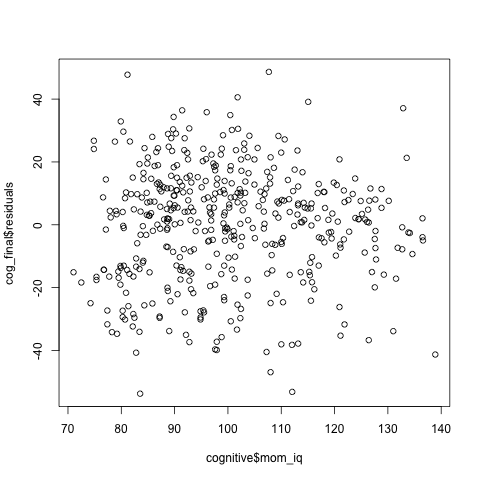

In [4]:
cog_final = lm(kid_score ~ mom_hs + mom_iq + mom_work, data =cognitive)
plot(cog_final$residuals ~ cognitive$mom_iq)

Recall our previous formula, we have three explanatory variables, but only one numerical, `mom_iq`. So this is the only variables that we want to validate the linearity. We plot on the residuals from `cog_final` result in y axis, and `mom_iq` in x-axis. So it seems we indeed have random scatter around zero.

![jpeg](../galleries/coursera-statistics/8w30.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/171) 03:04*

When we plot the residuals, we expect than random scatter is normal, centered around zero. We can see this by using histogram or normal probability plot.

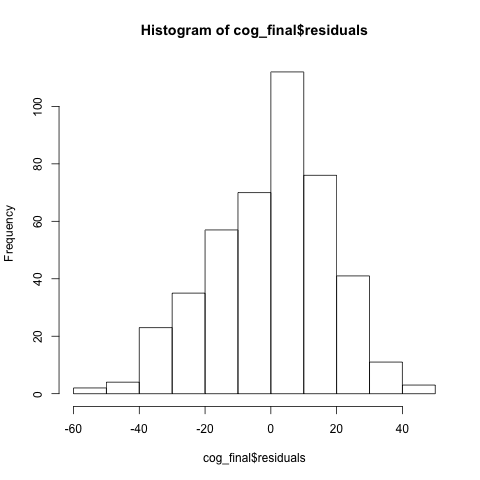

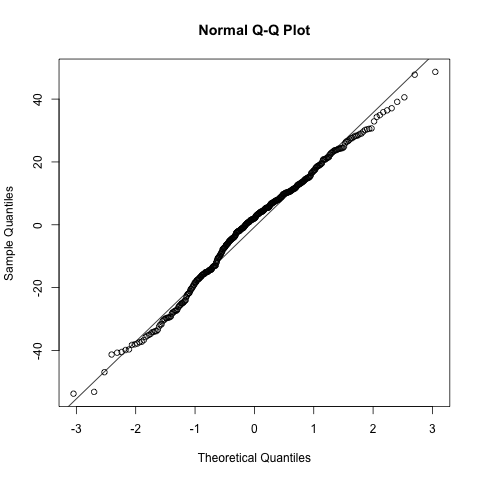

In [7]:
hist(cog_final$residuals)
qqnorm(cog_final$residuals)
qqline(cog_final$residuals)

When looking at the histogram, we see the the distribution of the residuals is slightly skewed. And looking at the deviation of points from mean line, only little in the middle, except for the tails area, the conditions are fairly satisfied.

![jpeg](../galleries/coursera-statistics/8w31.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/171) 04:35*

We plot the residuals vs predicted(not vs. x, because we're going to observe explanatory all at once) and observe that the plot should show points random scatter around zero, with constant width(not fan shape). We want also observe absolute residuals(convert all to positive side) to identify unusual observations.

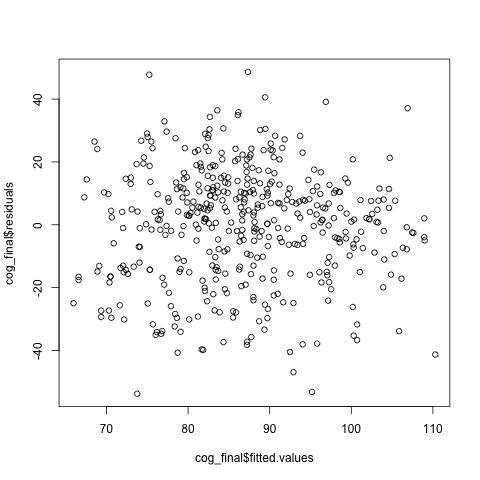

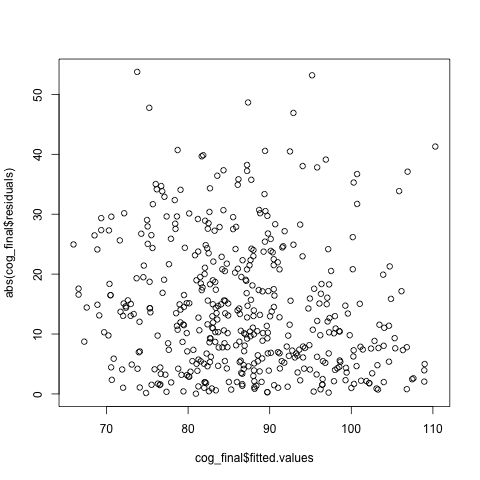

In [10]:
#in plot, fitted = predicted
plot(cog_final$residuals ~ cog_final$fitted.values)
plot(abs(cog_final$residuals) ~ cog_final$fitted.values)

Here we can see that the plotted residuals in y-axis, against the predicted(fitted) in x-axis. We want to observe whether the plot random scatter around zero, and doesn't have fan shape. We see that the condition is met, and observe the absolute residuals plot, fan shape will get converted into triangle to shape, which also not appear in the plot. 

![jpeg](../galleries/coursera-statistics/8w32.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/171) 06:36*

We want to observe that residuals(observations) are independent.This is specifically concerned when talking about time series data. We can check the residuals against the order collected(scatter plot). If doesn't met, think about how the data collected met independence conditions:

* Random sampling when observational study.
* Random assignment when controlled experiment.
* Less than 10% population.

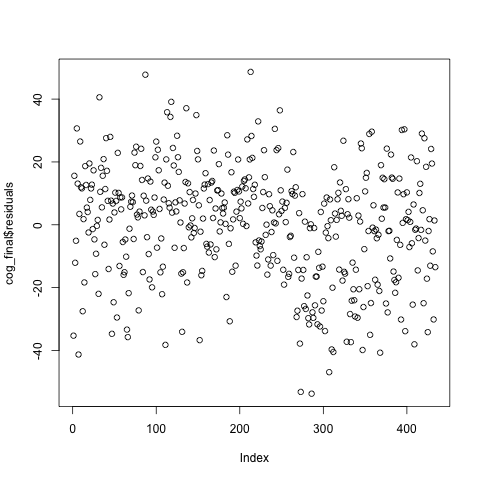

In [11]:
plot(cog_final$residuals)

We can see that there's no increase/decrease pattern, so we can assume that the residuals(observations) is independent.

So remember, the conditions are:

* Nearly normal residuals with mean 0
* Constant variability residuals
* Independent residuals
* Each numerical variable linearly related to the outcome.

In summary,

We can test the model whether it's significance using F-test. We have a skeptical where aare the slope is no difference, the alternative as at least one of the slope not equal to zero, and using degree of freedom(n-k-1). Usually this gets reported at the bottom of regression output.

Note that **p-value is arbitrary of each respective explanatory**. It will vary based on other predictors that are included in the model. As long as it below significance level, it will become a significance predictor, given other predictors included in the model. You need t_critical(based on significance level and degree of freedom) to be an input of both confidence interval and hypothesis testing.

We can use stepwise model selection to make the model become parsimonious model. There's two alternative to do, forward and backward stepwise selection. Using two method, adjusted R squared and p-value.

For backward stepwise, you start the with the full model. In adjusted R squared, try to eliminate one explanatory, and select the model with the highest adjusted R squared.If it's not get any higher, we cancel the elimination steps and choose that model. We keep eliminating the variables until we met the condition. For p-value, we also observe the regression output. Try to eliminate variables with the highest p-value, until there's no insignificant predictor, and the p-value of the model is still below the significance level. If p-value of at least one level in categorical explanatory is below the threshold, we shouldn't drop that explanatory.

For stepwise model, we start with empty model. We try to add one explnatory, and select the model with the highest adjusted R squared. And we keep adding it until the adjusted R squared is not getting any higher. For p-value we try to add one explanatory at a time, and pick the model with lowest p-value. Then we keep trying to add one explanatory, observe p-value, and check if it's significant/insignificant. If any of them are insignificant, we should stop adding the variables. Say, why in stepwise and backwise we don't select all at once explanatory variables that below significance level? Recall that p-value is arbitrary for each of the explanatory, depending on all other predictors in the model. p-value will change if the model change. So that's the reason why we add/eliminate one at a time.

Model Selection can also depending on expert opinion, you're domain expertise. If you know that the explanatory is significance, you should add those irrespective of whether p-value is insignificant/ adjusted R squared is not higher. When facing against two different model p-value vs adjusted R squared, you should also include expert opinion. Adjusted R squared will play more safely to select the model, hence more reliable vs p-value that have less explanatory overall.But p-value is more commonly, as less features are good, to avoid **curse of dimensionality**.

Finally, you should validate the conditions for MLR. You want each numerical to have linearity with the response, and validate that residuals are random scatter around zero, constant variability, normally distributed, and each is independent of one another.You use scatter plot between each of numerical explanatory and the residuals, to check whether it has linearity. You use histogram or probability plot to check whether the distribution of the residuals is nearly normal. You use scatter plot between residuals and predicted to check whether residuals has constant variability.You use scatter plot of residuals and index to check if each of the residuals is independent of one another.

> **REFERENCES**:

> Dr. Mine Çetinkaya-Rundel, [Cousera](https://class.coursera.org/statistics-003/lecture)